# Multiple Linear Regression of Tanks Dataset

In [2]:
# importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

In [2]:
# loading csv file of tanks, including 360 samples
df = pd.read_csv("e:/tanksdataset9parameters.csv")
# take a look at the dataset
df

,tank name,H/D,H,D,HL,HL/H (%full),t,max pga(abs value),magnitude,mesh edge size,actual max uplift
0,TANKA01,1.184211,4.5,3.8,4.2,0.933333,0.006,3.05900,6.19,0.2,0.045620
1,TANKA02,1.184211,4.5,3.8,4.2,0.933333,0.006,5.78550,6.69,0.2,0.058750
2,TANKA03,1.184211,4.5,3.8,4.2,0.933333,0.006,3.41200,6.90,0.2,0.045015
3,TANKA04,1.184211,4.5,3.8,4.2,0.933333,0.006,12.13980,6.61,0.2,0.057487
4,TANKA05,1.184211,4.5,3.8,4.2,0.933333,0.006,6.32480,6.93,0.2,0.025031
...,...,...,...,...,...,...,...,...,...,...,...
355,TANKD86,2.000000,20.0,10.0,10.0,0.500000,0.021,0.43100,6.19,1.0,0.010545
356,TANKD87,2.000000,20.0,10.0,10.0,0.500000,0.021,1.55900,6.69,1.0,0.010576
357,TANKD88,2.000000,20.0,10.0,10.0,0.500000,0.021,2.09840,6.90,1.0,0.010758
358,TANKD89,2.000000,20.0,10.0,10.0,0.500000,0.021,1.48070,6.61,1.0,0.010547


In [3]:
# changing the names of the columns (features)
ndf=df.rename(columns={'actual max uplift': 'actualmaxuplift', 'max pga(abs value)': 
                       'maxpga_absvalue' , 'mesh edge size': 'meshedgesize','HL/H (%full)': 'HLH','H/D': 'HD',})
ndf

,tank name,HD,H,D,HL,HLH,t,maxpga_absvalue,magnitude,meshedgesize,actualmaxuplift
0,TANKA01,1.184211,4.5,3.8,4.2,0.933333,0.006,3.05900,6.19,0.2,0.045620
1,TANKA02,1.184211,4.5,3.8,4.2,0.933333,0.006,5.78550,6.69,0.2,0.058750
2,TANKA03,1.184211,4.5,3.8,4.2,0.933333,0.006,3.41200,6.90,0.2,0.045015
3,TANKA04,1.184211,4.5,3.8,4.2,0.933333,0.006,12.13980,6.61,0.2,0.057487
4,TANKA05,1.184211,4.5,3.8,4.2,0.933333,0.006,6.32480,6.93,0.2,0.025031
...,...,...,...,...,...,...,...,...,...,...,...
355,TANKD86,2.000000,20.0,10.0,10.0,0.500000,0.021,0.43100,6.19,1.0,0.010545
356,TANKD87,2.000000,20.0,10.0,10.0,0.500000,0.021,1.55900,6.69,1.0,0.010576
357,TANKD88,2.000000,20.0,10.0,10.0,0.500000,0.021,2.09840,6.90,1.0,0.010758
358,TANKD89,2.000000,20.0,10.0,10.0,0.500000,0.021,1.48070,6.61,1.0,0.010547


In [4]:
# spliting the data into two group(train and test) randomly
msk = np.random.rand(len(ndf)) < 0.8
train = ndf[msk]
test = ndf[~msk]

In [5]:
# importing libraries
import matplotlib.pyplot as plt
import seaborn as ab
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

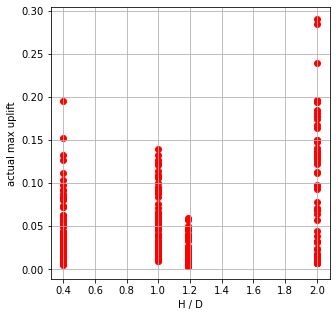

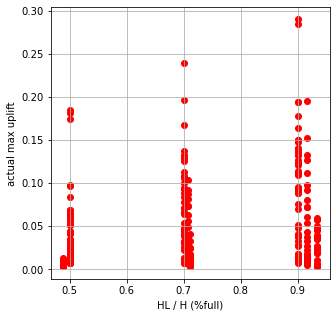

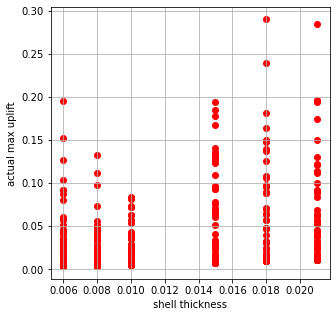

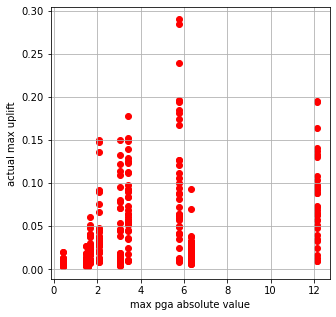

In [65]:
# creating scatter plots in order to obtain an overview about relation between features and target
plt.figure(figsize=(5,5))
plt.scatter(ndf.HD, ndf.actualmaxuplift , color='red' )
plt.xlabel("H / D")
plt.ylabel("actual max uplift")
plt.grid()

plt.figure(figsize=(5,5))
plt.scatter(ndf.HLH, ndf.actualmaxuplift , color='red' )
plt.xlabel("HL / H (%full)")
plt.ylabel("actual max uplift")
plt.grid()

plt.figure(figsize=(5,5))
plt.scatter(ndf.t, ndf.actualmaxuplift , color='red' )
plt.xlabel("shell thickness")
plt.ylabel("actual max uplift")
plt.grid()

plt.figure(figsize=(5,5))
plt.scatter(ndf.maxpga_absvalue, ndf.actualmaxuplift , color='red' )
plt.xlabel("max pga absolute value")
plt.ylabel("actual max uplift")
plt.grid()
plt.show()

In [45]:
# multiple regression model. introducing the features and target to the program
# the method used here is Ordinary Least Squares (OLS)
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['HD','H','D','HL','HLH','t','maxpga_absvalue','magnitude','meshedgesize']])
y = np.asanyarray(train[['actualmaxuplift']])
regr.fit (x, y)
# The coefficients and the intercept
print ('Coefficients: ', regr.coef_)
print ('intercept: ', regr.intercept_)

Coefficients:  [[ 3.09855629e-02 -1.32505574e-03  6.40833226e-04  2.19448085e-03
   5.57309055e-02 -1.00282072e+00  6.09692725e-03  1.19713792e-02
   3.48905167e-02]]
intercept:  [-0.16748744]


#### .......................................................................................................................................................................................................................
#### Ordinary Least Squares (OLS)

OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ($\hat{y}$) over all samples in the dataset.

OLS can find the best parameters using of the following methods:

*   Solving the model parameters analytically using closed-form equations
*   Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)

#### ......................................................................................................................................................................................................................
.

In [41]:
# prediction
y_hat= regr.predict(test[['HD','H','D','HL','HLH','t','maxpga_absvalue','magnitude','meshedgesize']])
x = np.asanyarray(test[['HD','H','D','HL','HLH','t','maxpga_absvalue','magnitude','meshedgesize']])
y = np.asanyarray(test[['actualmaxuplift']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 0.00
Variance score: 0.31


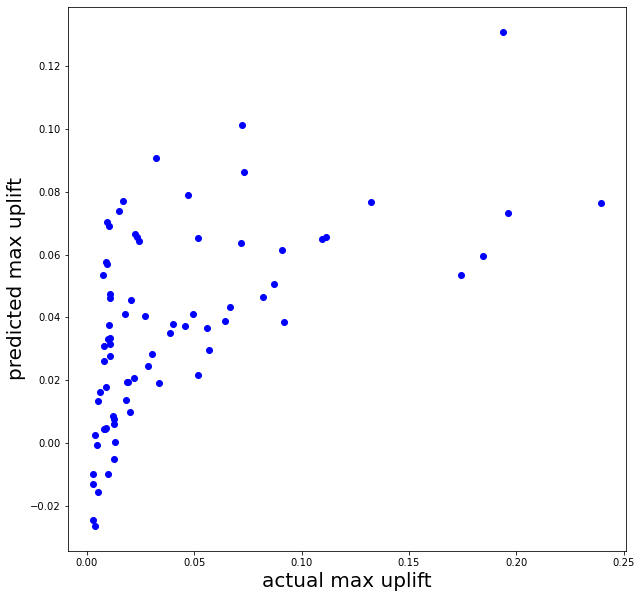

In [71]:
# plotting actual max uplift and predicted max uplift

plt.figure(figsize=(10,10))
plt.scatter(y, y_hat , color='blue')

plt.xlabel("actual max uplift",fontsize=20)
plt.ylabel("predicted max uplift",fontsize=20)
plt.show()

# ..................................................................................................................................
# Conclusion : As can be seen in the last figure, and also based on variance score, the multi-linear regression model has not been able to predict the shell uplift values very well.Seemingly multi-linear regression model would not be a suitable model for predicting the relation between the target and the variables. Thus we should try other kinds of ML models namely non-linear regression etc.
# ..................................................................................................................................

In [3]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y)))

NameError: name 'y_hat' is not defined